<a href="https://colab.research.google.com/github/asdswsxs/style-gan/blob/main/pre_train_styleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

style gan by using pre trained model first at all i want to train a stylegan model by my self but cost is to big to train a model by colab

so i choosing fine-truing an oss stylegan code by my dataset

In [1]:
!rm -rf /content/stylegan2

In [29]:
%cd /content

/content


In [30]:
!git clone https://github.com/NVlabs/stylegan2.git

Cloning into 'stylegan2'...
remote: Enumerating objects: 127, done.
remote: Total 127 (delta 0), reused 0 (delta 0), pack-reused 127
Receiving objects: 100% (127/127), 591.89 KiB | 2.96 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [ ]:
%cd /content/stylegan/
!python dataset_tool.py create_celeba datasets/custom-dataset /content/drive/MyDrive/celeba_data/sideburns_celeba/bear/

In [45]:
%tensorflow_version 1.x
import tensorflow as tf

%cd /content/stylegan2/

import pretrained_networks
from google_drive_downloader import GoogleDriveDownloader as gdd

network_pk1 = "/content/drive/MyDrive/stylegan2-ffhq-config-b.pkl"

_D,_G,Gs = pretrained_networks.load_networks(network_pk1)

/content/stylegan2
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.


Now, need to generate a random vector z as input to the generator. Let's create a function to generate the latent code z from a given seed. 




i was always thinking about if i grow a whiskers what i look like. but i don't looks like whiskers DNA 

so i got an idea how about a generator a picture which my face got whiskers by using GAN

In [34]:
import numpy as np

def generate_zs_from_seeds(seeds):
  zs = []
  for seed_idx,seed in enumerate(seeds):
    rnd = np.random.RandomState(seed)
    z = rnd.randn(1,*Gs.input_shape[1:]) # [minibatch,component]
    zs.append(z)
  return zs

In [35]:
import dnnlib
import dnnlib.tflib as tflib
import PIL.Image
from tqdm import tqdm


noise_vars = [var for name,var in Gs.components.synthesis.vars.items()]

def generate_images(zs,truncation_psi):
  Gs_kwargs = dnnlib.EasyDict()
  Gs_kwargs.output_transform = dict(func = tflib.convert_images_to_uint8,nchw_to_nhwc = True)
  Gs_kwargs.randomize_noise = False
  if not isinstance(truncation_psi,list):
    truncation_psi = [truncation_psi] * len(zs)

  imgs = []
  for z_idx,z in tqdm(enumerate(zs)):
    Gs_kwargs.truncation_psi = truncation_psi[z_idx]
    noise_rnd = np.random.RandomState(1)
    tflib.set_vars({var: noise_rnd.randn(*var.shape.as_list()) for var in noise_vars})
    images = Gs.run(z,None,**Gs_kwargs) #[minibatch,height,width,channel]
    imgs.append(PIL.Image.fromarray(images[0],"RGB"))

    return imgs

def generate_images_from_seeds(seeds,truncation_psi):
  return generate_images(generate_zs_from_seeds(seeds),truncation_psi)


random seeds

**To-do** 

find whiskers seed

In [48]:
seeds = np.random.randint(10030000,size = 9)
print(seeds)

zs = generate_zs_from_seeds(seeds)
imgs = generate_images(zs,0.5)


0it [00:00, ?it/s]

[5955878 3641058 6419669  343412  636092 4265621 7071503 9797881 6630978]


0it [00:01, ?it/s]


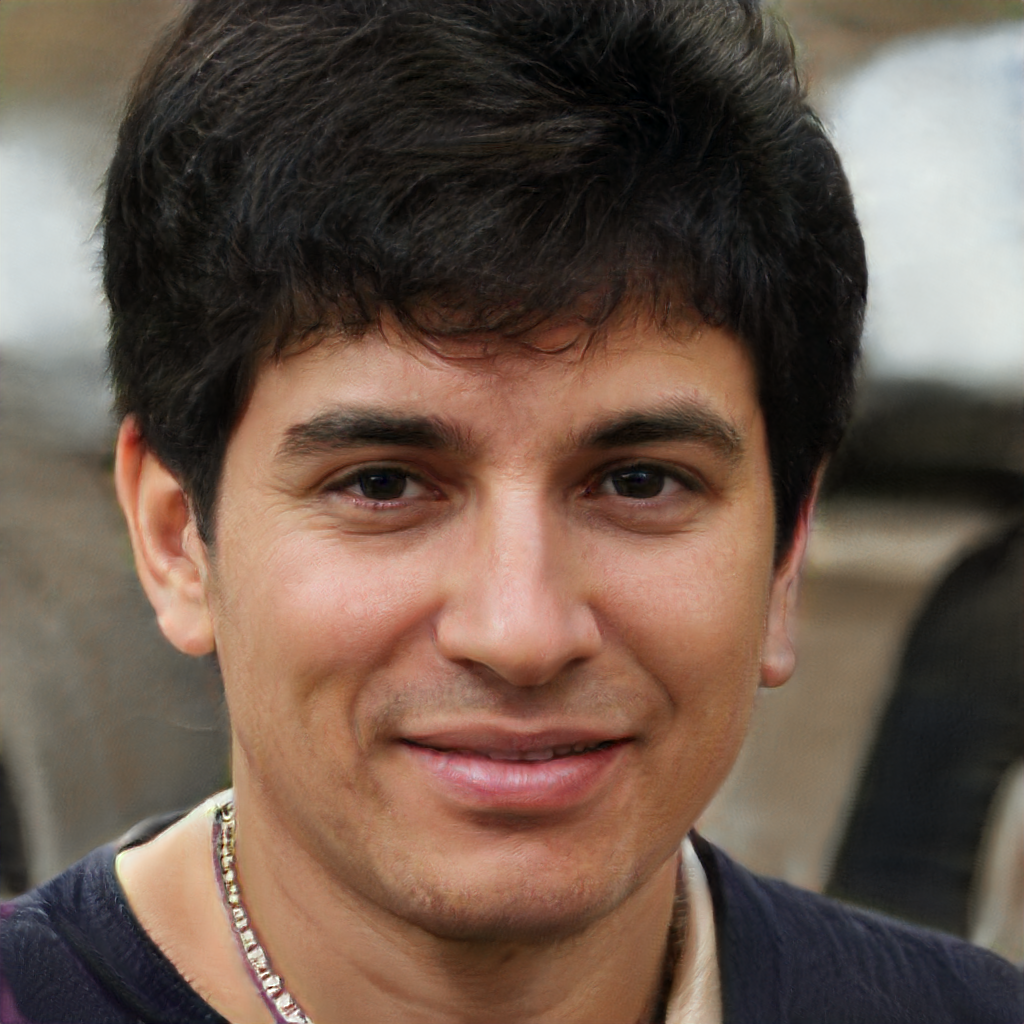

In [49]:
imgs[0]

In [ ]:
from math import ceil

def createImageGrid(images,scale= 0.25,rows=1):
  w,h = images[0].size
  w = int(w*scale)
  h = int(h*scale)
  height = rows*h

  cols = ceil(len(images)/ rows)
  width = cols*w
  canvas = PIL.Image.new("RGBA",(width,height),"white")

  for i,img in enumerate(images):
    img = img.resize((w,h),PIL.Image.ANTIALIAS)
    canvas.paste(img,(w*(i % cols),h*(i //cols)))

  return canvas

In [ ]:
createImageGrid(imgs,rows=3)